         lr  forgetting_factor
0  0.002727          10.929426
1  0.001184          17.070128
2  0.003054          37.226569
3  0.003713          23.850585
4  0.003552          35.939942
5  0.002027          15.498528
6  0.001434          28.044593
7  0.001684          21.540005
8  0.003237          25.703203
9  0.002330          33.698206


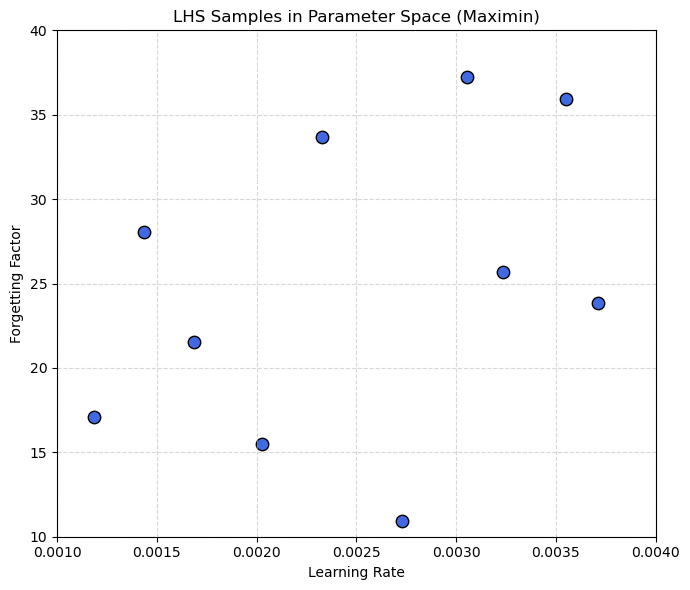

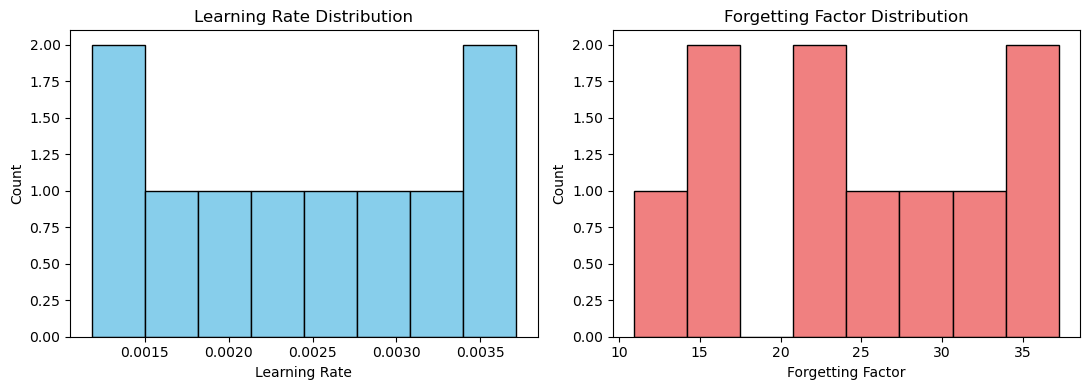

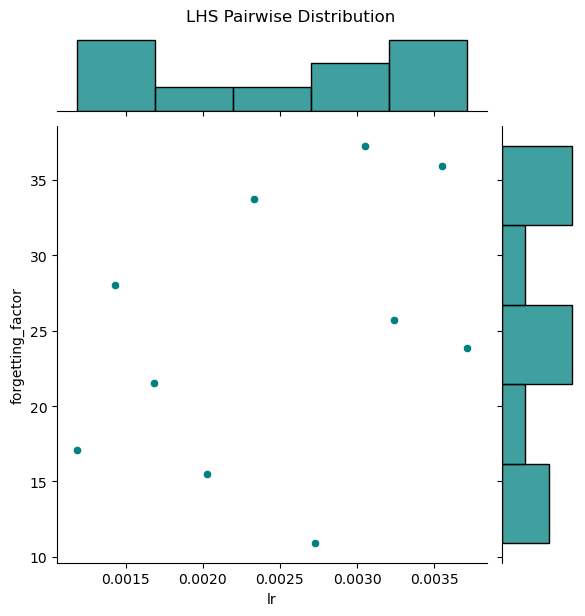

In [72]:
import numpy as np
import pandas as pd
from pyDOE2 import lhs
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 샘플 개수 설정 (예: 20개)
n_samples = 10

# 2. 라틴 하이퍼큐브로 [0,1] 구간에서 2차원(파라미터 2개) 샘플 생성 (Maximin for even spread)
lhs_raw = lhs(n=2, samples=n_samples, criterion='maximin')

# 3. 파라미터 범위 정의 (원하는 값으로 조절)
lr_min, lr_max = 0.001, 0.004      # Learning rate 범위
ff_min, ff_max = 10.0, 40.0        # Forgetting factor 범위

# 4. [0,1] 범위의 lhs_raw 샘플을 위 범위로 선형 스케일링
lr_samples = lr_min + (lr_max - lr_min) * lhs_raw[:, 0]
ff_samples = ff_min + (ff_max - ff_min) * lhs_raw[:, 1]

# 5. 데이터프레임으로 정리
df = pd.DataFrame({
    'lr': lr_samples,
    'forgetting_factor': ff_samples
})

print(df)

# 6. 샘플 분포 시각화 (2D scatter)
plt.figure(figsize=(7, 6))
plt.scatter(df['lr'], df['forgetting_factor'], s=80, edgecolor='k', c='royalblue')
plt.xlabel('Learning Rate')
plt.ylabel('Forgetting Factor')
plt.title('LHS Samples in Parameter Space (Maximin)')
plt.xlim(lr_min, lr_max)
plt.ylim(ff_min, ff_max)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 7. 개별 파라미터 히스토그램
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
axes[0].hist(df['lr'], bins=8, edgecolor='k', color='skyblue')
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('Count')
axes[0].set_title('Learning Rate Distribution')
axes[1].hist(df['forgetting_factor'], bins=8, edgecolor='k', color='lightcoral')
axes[1].set_xlabel('Forgetting Factor')
axes[1].set_ylabel('Count')
axes[1].set_title('Forgetting Factor Distribution')
plt.tight_layout()
plt.show()

# 8. jointplot으로 분포 확인 (선택적)
sns.jointplot(data=df, x='lr', y='forgetting_factor', kind='scatter', height=6, color='teal')
plt.suptitle("LHS Pairwise Distribution", y=1.02)
plt.show()
